In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [ ]:
df = pd.read_csv('microbusiness_density.csv',parse_dates=True, na_values={'microbusiness_density': 0,'pct_college': 0,})
df.head()

,cfips,county,state,first_day_of_month,microbusiness_density,active,year,month,pct_broadband,pct_college,pct_foreign_born,pct_IT_workers,median_income
0,1001,Autauga County,Alabama,2019-08-01,3.007682,1249.0,2019,8,76.6,14.5,2.1,1.3,55317.0
1,1001,Autauga County,Alabama,2019-09-01,2.884870,1198.0,2019,9,76.6,14.5,2.1,1.3,55317.0
2,1001,Autauga County,Alabama,2019-10-01,3.055843,1269.0,2019,10,76.6,14.5,2.1,1.3,55317.0
3,1001,Autauga County,Alabama,2019-11-01,2.993233,1243.0,2019,11,76.6,14.5,2.1,1.3,55317.0
4,1001,Autauga County,Alabama,2019-12-01,2.993233,1243.0,2019,12,76.6,14.5,2.1,1.3,55317.0


In [ ]:
df.tail()

,cfips,county,state,first_day_of_month,microbusiness_density,active,year,month,pct_broadband,pct_college,pct_foreign_born,pct_IT_workers,median_income
128530,56045,Weston County,Wyoming,2022-08-01,1.785395,100.0,2022,8,79.7,12.7,2.3,0.0,53333.0
128531,56045,Weston County,Wyoming,2022-09-01,1.785395,100.0,2022,9,79.7,12.7,2.3,0.0,53333.0
128532,56045,Weston County,Wyoming,2022-10-01,1.785395,100.0,2022,10,79.7,12.7,2.3,0.0,53333.0
128533,56045,Weston County,Wyoming,2022-11-01,1.785395,100.0,2022,11,79.7,12.7,2.3,0.0,53333.0
128534,56045,Weston County,Wyoming,2022-12-01,1.803249,101.0,2022,12,79.7,12.7,2.3,0.0,53333.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128535 entries, 0 to 128534
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   cfips                  128535 non-null  int64  
 1   county                 128535 non-null  object 
 2   state                  128535 non-null  object 
 3   first_day_of_month     128535 non-null  object 
 4   microbusiness_density  128508 non-null  float64
 5   active                 128535 non-null  float64
 6   year                   128535 non-null  int64  
 7   month                  128535 non-null  int64  
 8   pct_broadband          128535 non-null  float64
 9   pct_college            128499 non-null  float64
 10  pct_foreign_born       128535 non-null  float64
 11  pct_IT_workers         128535 non-null  float64
 12  median_income          128535 non-null  float64
dtypes: float64(7), int64(3), object(3)
memory usage: 12.7+ MB


In [ ]:
df.isna().sum()

cfips                     0
county                    0
state                     0
first_day_of_month        0
microbusiness_density    27
active                    0
year                      0
month                     0
pct_broadband             0
pct_college              36
pct_foreign_born          0
pct_IT_workers            0
median_income             0
dtype: int64

In [ ]:
df.describe()

,cfips,microbusiness_density,active,year,month,pct_broadband,pct_college,pct_foreign_born,pct_IT_workers,median_income
count,128535.00000,128508.000000,1.285350e+05,128535.000000,128535.000000,128535.000000,128499.000000,128535.000000,128535.000000,128535.000000
mean,30376.03764,3.803744,6.461169e+03,2020.756098,6.926829,74.875309,14.244595,4.745281,1.353570,52938.385809
std,15143.50570,4.574809,3.311759e+04,1.006822,3.466862,9.359598,5.686677,5.709932,0.961567,14162.782751
min,1001.00000,0.063837,0.000000e+00,2019.000000,1.000000,24.500000,0.300000,0.000000,0.000000,19264.000000
25%,18177.00000,1.642896,1.450000e+02,2020.000000,4.000000,69.500000,10.100000,1.400000,0.700000,43597.000000
50%,29173.00000,2.591775,4.900000e+02,2021.000000,7.000000,76.000000,13.300000,2.700000,1.200000,51179.000000
75%,45077.00000,4.526988,2.126500e+03,2022.000000,10.000000,81.400000,17.400000,5.700000,1.800000,59314.000000
max,56045.00000,284.340030,1.167744e+06,2022.000000,12.000000,97.100000,48.000000,54.000000,17.400000,147111.000000


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.shape

(128477, 13)

In [ ]:
# Compute z-scores for selected columns
df['cfips_zscore'] = zscore(df['cfips'])
df['microbusiness_density_zscore'] = zscore(df['microbusiness_density'])
df['median_income_zscore'] = zscore(df['median_income'])
df['pct_college_zscore'] = zscore(df['pct_college'])
df['pct_IT_workers_zscore'] = zscore(df['pct_IT_workers'])

# Filter the DataFrame based on z-score criteria to remove outliers
df = df[
    (df['cfips_zscore'].abs() < 3) &
    (df['microbusiness_density_zscore'].abs() < 3) &
    (df['median_income_zscore'].abs() < 3) &
    (df['pct_college_zscore'].abs() < 3) &
    (df['pct_IT_workers_zscore'].abs() < 3)
]

# Drop the z-score columns if no longer needed
df = df.drop(['cfips_zscore', 'microbusiness_density_zscore', 'median_income_zscore', 'pct_college_zscore', 'pct_IT_workers_zscore'], axis=1)

In [ ]:
df.shape

(123472, 13)

In [ ]:
df.describe()

,cfips,microbusiness_density,active,year,month,pct_broadband,pct_college,pct_foreign_born,pct_IT_workers,median_income
count,123472.000000,123472.000000,123472.000000,123472.000000,123472.000000,123472.000000,123472.000000,123472.000000,123472.000000,123472.000000
mean,30427.419747,3.362980,4615.232741,2020.751806,6.929409,74.493520,13.834443,4.462394,1.271150,51858.507783
std,15118.529477,2.618424,20817.619760,1.007561,3.466886,9.151696,5.117938,5.262475,0.778902,12208.169107
min,1001.000000,0.063837,1.000000,2019.000000,1.000000,24.500000,0.300000,0.000000,0.000000,19264.000000
25%,18183.000000,1.625135,143.000000,2020.000000,4.000000,69.300000,10.000000,1.400000,0.700000,43373.000000
50%,29177.000000,2.520749,468.000000,2021.000000,7.000000,75.700000,13.000000,2.600000,1.200000,50840.000000
75%,45075.000000,4.261473,1849.000000,2022.000000,10.000000,81.000000,16.900000,5.400000,1.700000,58641.000000
max,56045.000000,17.527773,502633.000000,2022.000000,12.000000,94.700000,31.300000,54.000000,4.200000,95064.000000


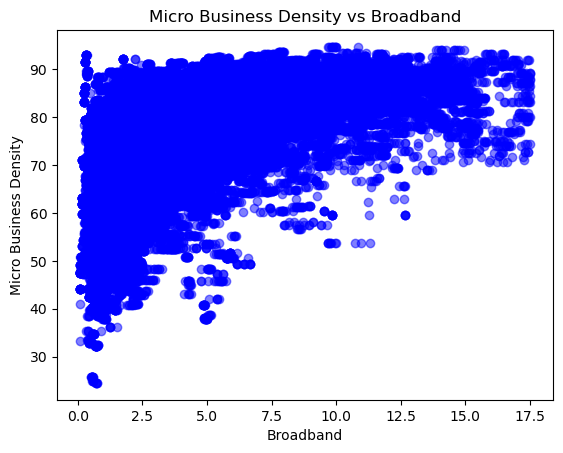

In [ ]:
plt.scatter(df['microbusiness_density'], df['pct_broadband'], color='blue', alpha=0.5)
plt.xlabel('Broadband')
plt.ylabel('Micro Business Density')
plt.title('Micro Business Density vs Broadband')
plt.show()

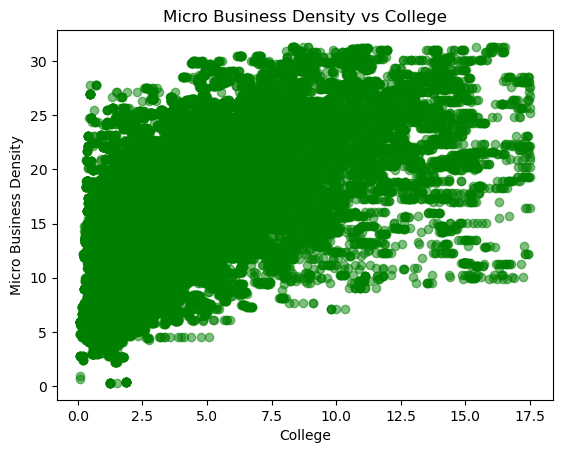

In [ ]:
plt.scatter(df['microbusiness_density'], df['pct_college'], color='green', alpha=0.5)
plt.xlabel('College')
plt.ylabel('Micro Business Density')
plt.title('Micro Business Density vs College')
plt.show()

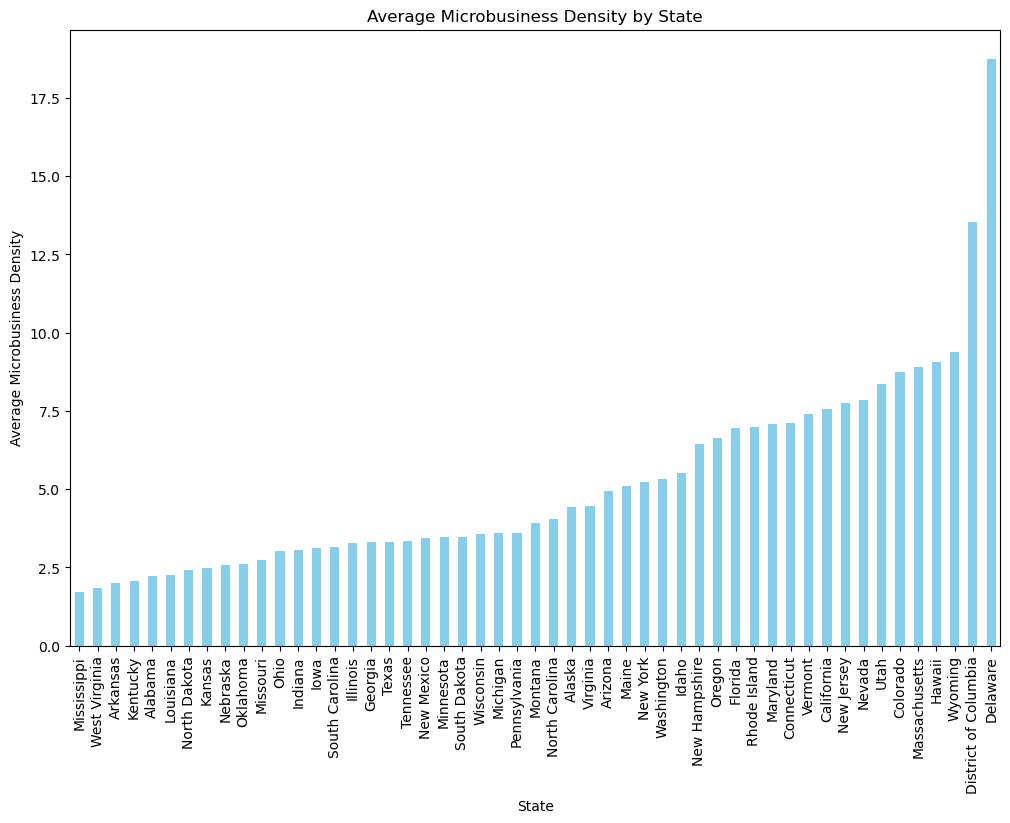

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the dataset
df = pd.read_csv('microbusiness_density.csv')

# Summarize data by state and calculate the mean microbusiness density
state_microbusiness_density = df.groupby('state')['microbusiness_density'].mean().sort_values()

# Plot the bar graph
plt.figure(figsize=(12, 8))
state_microbusiness_density.plot(kind='bar', color='skyblue')
plt.xlabel('State')
plt.ylabel('Average Microbusiness Density')
plt.title('Average Microbusiness Density by State')
plt.xticks(rotation=90)
plt.show()


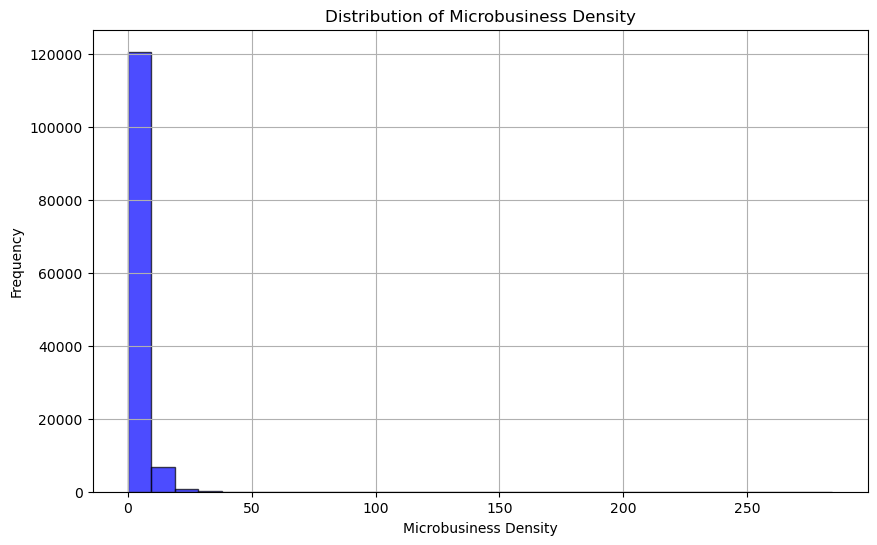

In [ ]:
# Histogram of Microbusiness Density
plt.figure(figsize=(10, 6))
plt.hist(df['microbusiness_density'], bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.title('Distribution of Microbusiness Density')
plt.xlabel('Microbusiness Density')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


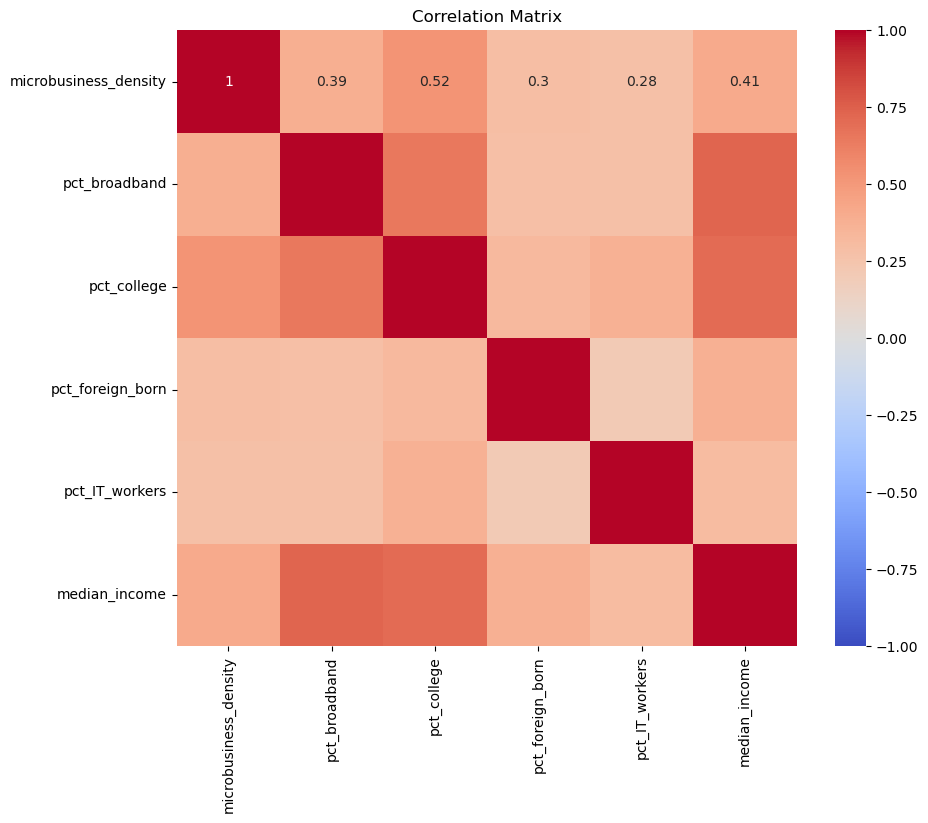

In [ ]:
import seaborn as sns
import numpy as np

# Select relevant columns for correlation matrix
corr = df[['microbusiness_density', 'pct_broadband', 'pct_college', 'pct_foreign_born', 'pct_IT_workers', 'median_income']].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


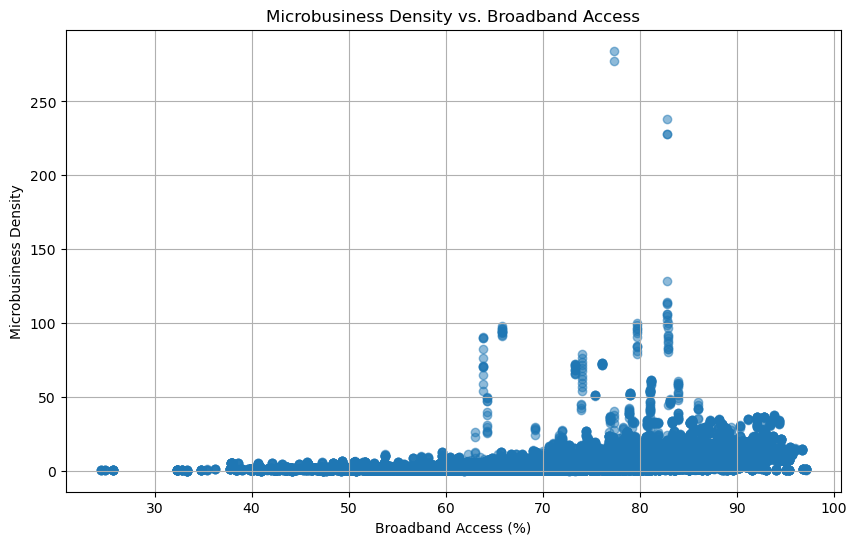

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot: Microbusiness Density vs. Broadband Access
plt.figure(figsize=(10, 6))
plt.scatter(df['pct_broadband'], df['microbusiness_density'], alpha=0.5)
plt.title('Microbusiness Density vs. Broadband Access')
plt.xlabel('Broadband Access (%)')
plt.ylabel('Microbusiness Density')
plt.grid(True)
plt.show()


In [ ]:
# Step 4: Data Preprocessing

# Select relevant variables
selected_features = ['pct_broadband', 'pct_college', 'pct_foreign_born', 'pct_IT_workers', 'median_income']
X = df[selected_features].copy()
y = df['microbusiness_density']

# Check for any remaining missing values
print("Missing values before handling:")
print(X.isna().sum())

# Handling Missing Values (if any)
X = X.fillna(X.mean())

# Check for missing values again
print("Missing values after handling:")
print(X.isna().sum())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Output the first few rows of the preprocessed data
print("First few rows of the preprocessed data (X_train_scaled):")
print(X_train_scaled[:5])


Missing values before handling:
pct_broadband       0
pct_college         0
pct_foreign_born    0
pct_IT_workers      0
median_income       0
dtype: int64
Missing values after handling:
pct_broadband       0
pct_college         0
pct_foreign_born    0
pct_IT_workers      0
median_income       0
dtype: int64
First few rows of the preprocessed data (X_train_scaled):
[[-1.05506679 -0.62286308 -0.1656616  -0.67799144 -1.1891214 ]
 [-0.65998279 -0.34166755  0.3254684  -0.78178983 -0.88317173]
 [ 0.37577796  0.41404543 -0.42876696  0.04859733  1.24072849]
 [-0.71337252 -0.57013891 -0.70941268 -0.98938662 -0.74097973]
 [-0.12608549 -0.23621923 -0.72695303 -1.40458021  0.12122279]]


In [ ]:
# Step 5: Fitting Models

# Fit multiple models
models = {
    'Linear Regression': LinearRegression(),
    'Support Vector Regression': SVR(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

# Train and evaluate the models
model_performance = {}
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    model_performance[model_name] = {'MSE': mse, 'R2': r2}

# Output model performance
print("Model performance:")
for model_name, performance in model_performance.items():
    print(f"{model_name}: MSE = {performance['MSE']}, R2 = {performance['R2']}")


Model performance:
Linear Regression: MSE = 13.64284198398758, R2 = 0.3145575971655358
Support Vector Regression: MSE = 12.652236950749938, R2 = 0.364327483457502
Decision Tree: MSE = 2.504387997083359, R2 = 0.8741747703033301
Random Forest: MSE = 2.2984584226987637, R2 = 0.8845210648984391
